# TMA4135 Exercise 7:
### Author: Simen Kristiansen Sandhaug 
---

## Table of Contents
- [Problem 1](#p1-runge-kutta-implementation)
  - [1a](#1a)
  - [1b](#1b)
- [Problem 2](#p2-initial-value-problem)
  - [2a](#2a)
  - [2b](#2b)
  - [2c](#2c)
  - [2d](#2d)
- [Problem 3](#p3-numerical-ode-methods-for-a-spring)
  - [3a](#3a)
  - [3b](#3b)
  - [3c](#3c)
  - [3d](#3d)
- [Problem 4](#p4-implementation-of-an-ode-solver)
  - [4a](#4a)
  - [4b](#4b)
  - [4c](#4c)
  - [4d](#4d)
---

# P1. (Runge Kutta Implementation)

## 1a)

The classical 4th order Runge–Kutta method is given as:

$$
k_1 = f(t_n, y_n)
$$
$$
k_2 = f\left(t_n + \frac{h}{2}, y_n + \frac{h}{2} k_1\right)
$$
$$
k_3 = f\left(t_n + \frac{h}{2}, y_n + \frac{h}{2} k_2\right)
$$
$$
k_4 = f(t_n + h, y_n + hk_3)
$$
$$
y_{n+1} = y_n + \frac{h}{6} (k_1 + 2k_2 + 2k_3 + k_4)
$$

Implement this method in Python.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def rk4(f, y0, t0, tn, h):
    t_values = np.arange(t0, tn + h, h)
    y_values = np.zeros(len(t_values))
    y_values[0] = y0
    t = t0
    y = y0
    for i in range(1, len(t_values)):
        k1 = f(t, y)
        k2 = f(t + h/2, y + h/2 * k1)
        k3 = f(t + h/2, y + h/2 * k2)
        k4 = f(t + h, y + h * k3)
        y += h / 6 * (k1 + 2*k2 + 2*k3 + k4)
        t += h
        y_values[i] = y
    return t_values, y_values

# 1b) 
Verify numerically that this method has a convergence order \( p = 4 \).

You may use the example problem:

$$
\frac{{dy}}{{dt}} = -2ty, \quad y(0) = 1
$$

Recall that the analytic solution is $ y(t) = e^{-t^2} $.

In [14]:
def ode(t, y):
    return -2 * t * y

def exact_solution_ode(t):
    return np.exp(-t**2)

step_sizes = [0.1, 0.05, 0.025, 0.0125]
errors = []
t_specific = 2.0  # A specific point in time to evaluate the error

for h in step_sizes:
    t_values, y_values = rk4(ode, y0=1, t0=0, tn=5, h=h)
    idx = np.argmin(np.abs(t_values - t_specific))  # Find the index closest to t_specific
    y_numeric = y_values[idx]
    y_exact = exact_solution_ode(t_specific)
    error = np.abs(y_numeric - y_exact)
    errors.append(error)

# Calculate the order of convergence p
p_values = []
for i in range(len(errors) - 1):
    p = np.log(errors[i+1] / errors[i]) / np.log(step_sizes[i+1] / step_sizes[i])
    p_values.append(p)

p_values

[4.19290307580392, 4.096968371534656, 4.04860215936042]

# P2. (Initial Value Problem)

## 2a) 
Find the exact solution to the equation, then compute $y(0.4)$.

_Hint: You should obtain that_ $y(0.4) = \frac{25}{29}$.

We have
$$
y´ = -2ty^2, \quad \quad y(0)=1.
$$



We can solve this easily by dividing by $y^2$ and integrating both sides

$$
\int_{1}^{y} \frac{1}{y^2} \, dy = \int_{0}^{t} -2t \,dt 
$$

Which gives us
$$
1 - \frac{1}{y} = C_1 - t^2
$$

Initial conditions $y(0) = 1.$ gives

$$
1 - \frac{1}{1} = C_1 - 0^2 \Rightarrow C_1 = 0
$$

So

$$
y(t) = \frac{1}{1 + t^2}
$$

and thus $y(0.4) = \frac{1}{1 + (0.4)^2} = \frac{25}{29}$


## 2b)

Perform 4 steps of Euler's method with $ h = 0.1 $. Compute the error at the last step, that is $ e_4 := |y_4 - y(0.4)| $.


In [51]:
def euler_method(f, y0, t0, tn, h):
    t_values = [t0]
    y_values = [y0]
    t = t0
    y = y0
    
    while t < tn:
        y = y + h * f(t, y)
        t += h
        t_values.append(t)
        y_values.append(y)
        
    return np.array(t_values), np.array(y_values)

def ivp(t, y):
    return -2 * t * y**2

def exact_solution_ivp(t):
    return 1 / (1 + t**2)

t_values, y_values_euler = euler_method(ivp, y0=1, t0=0, tn=0.4, h=0.1)
y_values_exact = exact_solution_ivp(t_values)

print(f"Error at t=0.4: {np.abs(y_values_euler[4] - y_values_exact[4])}")

Error at t=0.4: 0.026320208739398665


The error at the last step, $e_4 := \|y_4 - y(0.4)\| \approx 0.037$

## 2c)
Perform 2 steps of Heun's method with $ h = 0.2 $. Compute the error at the last step, that is $ e_2 := |y_2 - y(0.4)| $.

In [50]:
def heun_method(f, y0, t0, tn, h):
    t_values = [t0]
    y_values = [y0]
    t = t0
    y = y0
    
    while t < tn:
        k1 = f(t, y)
        k2 = f(t + h, y + h * k1)
        y = y + (h / 2) * (k1 + k2)
        t += h
        t_values.append(t)
        y_values.append(y)
        
    return np.array(t_values), np.array(y_values)


t_values, y_values_heun = heun_method(ivp, y0=1, t0=0, tn=0.4, h=0.2)
y_values_exact = exact_solution_ivp(t_values)

print(f"Error at t=0.4: {np.abs(y_values_heun[2] - y_values_exact[2])}")

Error at t=0.4: 0.001771210155961378


The error at the last step, $e_2 := \|y_2 - y(0.4)\| \approx 0.0018$

## 2d)
Perform 1 step of the classical 4th order Runge-Kutta method (as described in the problem above) with $ h = 0.4 $. 

Compute the error at the last step, that is $ e_1 := |y_1 - y(0.4)| $. In each case, 4 function evaluations were needed. Which of the methods performed best?


In [46]:
t_values, y_values_rk = rk4(ivp, y0=1, t0=0, tn=0.4, h=0.4)
y_values_exact = exact_solution_ivp(t_values)

print(f"Error at t=0.4: {np.abs(y_values_rk[1] - y_values_exact[1])}")

Error at t=0.4: 0.00040985403862792147


The error at the last step, $e_1 := \|y_1 - y(0.4)\| \approx 0.0004$.

The Runge Kutta method performed the best

# P3. (Numerical ODE-methods for a spring)

We consider the coupled mass-spring system described by the equations:

$$
m_1 u'' = -k_1 u + k_2 (v - u)
$$
$$
m_2 v'' = -k_2 (v - u)
$$

with initial conditions $ u(0) = a $, $ u'(0) = b $, $ v(0) = c $, $ v'(0) = d $.

## 3a) 
Rewrite this second order system as a system of four first-order ODEs.


In [78]:
# Initial conditions
y0 = np.array([0, 1, 0, 1])  # [u(0), u'(0), v(0), v'(0)]

def f(t, y, k1=100, k2=200, m1=10, m2=5):
    u, u_prime, v, v_prime = y
    return np.array([
        u_prime,
        (-k1 * u + k2 * (v - u)) / m1,
        v_prime,
        (-k2 * (v - u)) / m2
    ])

## 3b) 
Perform one step of Heun’s method with step length $ h = 0.1 $.


In [86]:
t_values, y_values = heun_method(f, y0, t0=0, tn=0.1, h=0.1)
y1 = y_values[1]
print(y1)

[0.1  0.95 0.1  1.  ]



$$ 
\vec{y_1} = \begin{pmatrix} 0.1 \\ 0.95 \\ 0.1 \\ 1.0 \end{pmatrix} 
$$


## 3c) 
Use both Euler’s method and Heun’s method for numerical approximation on the interval [0, 3].


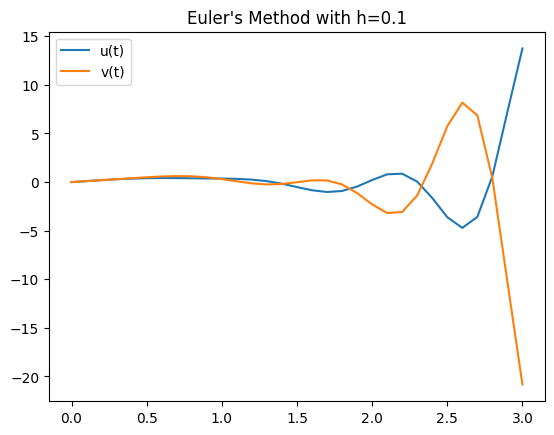

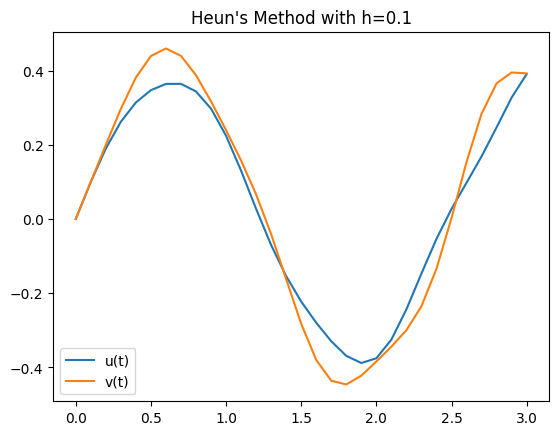

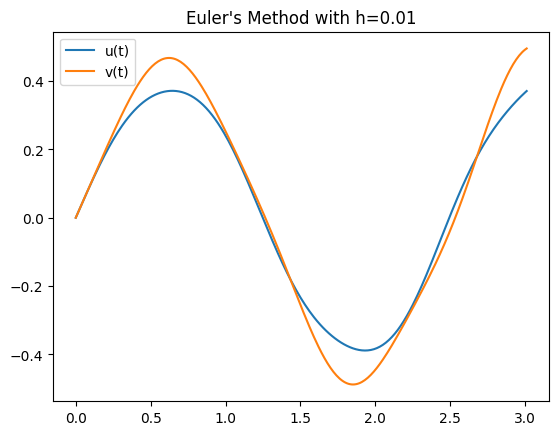

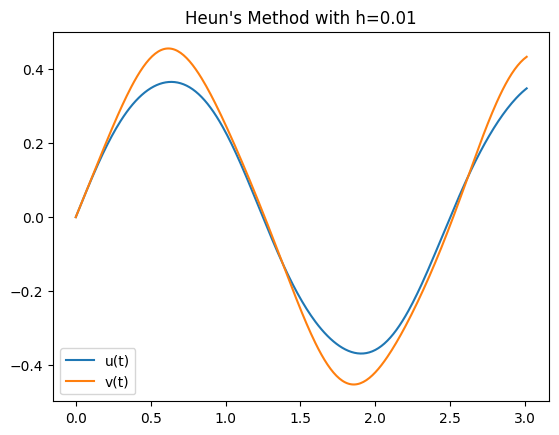

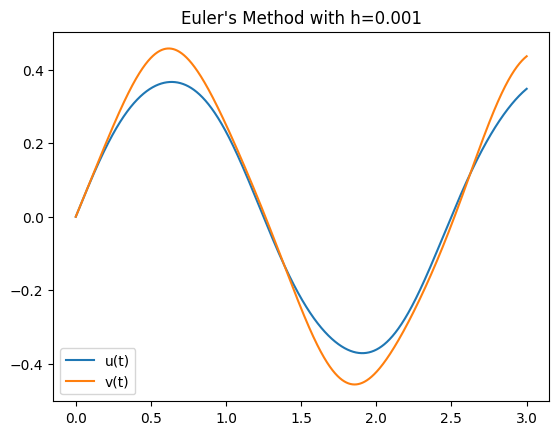

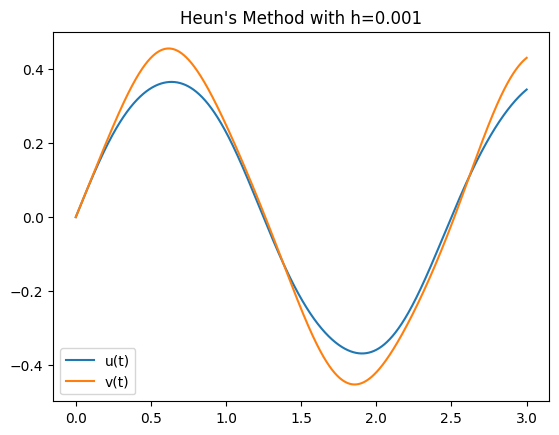

In [80]:
t0 = 0
tn = 3
step_lengths = [0.1, 0.01, 0.001]

for h in step_lengths:
    t_values, y_values = euler_method(f, y0, t0, tn, h)
    plt.figure()
    plt.title(f"Euler's Method with h={h}")
    plt.plot(t_values, y_values[:, 0], label='u(t)')
    plt.plot(t_values, y_values[:, 2], label='v(t)')
    plt.legend()

    t_values, y_values = heun_method(f, y0, t0, tn, h)
    plt.figure()
    plt.title(f"Heun's Method with h={h}")
    plt.plot(t_values, y_values[:, 0], label='u(t)')
    plt.plot(t_values, y_values[:, 2], label='v(t)')
    plt.legend()
    plt.show()

## 3d) 
Test numerically to which extent the energy $ E $ is conserved.


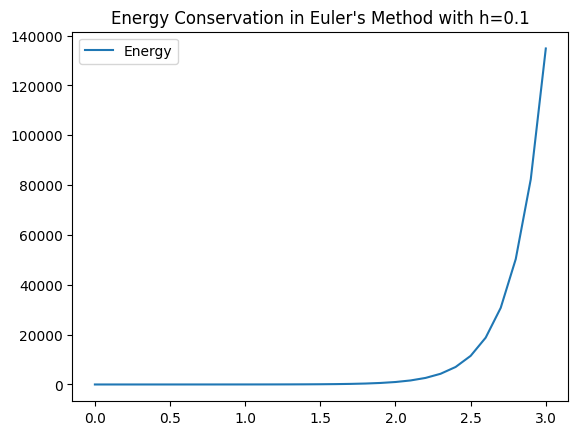

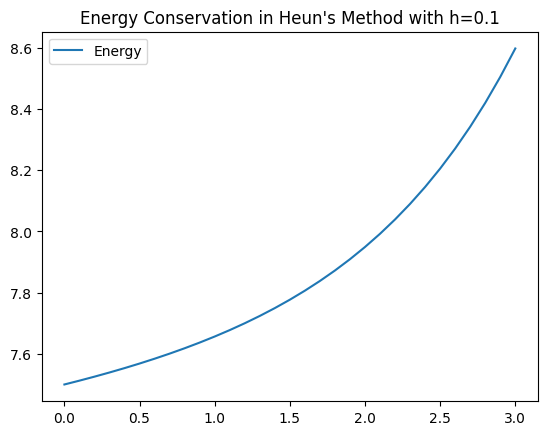

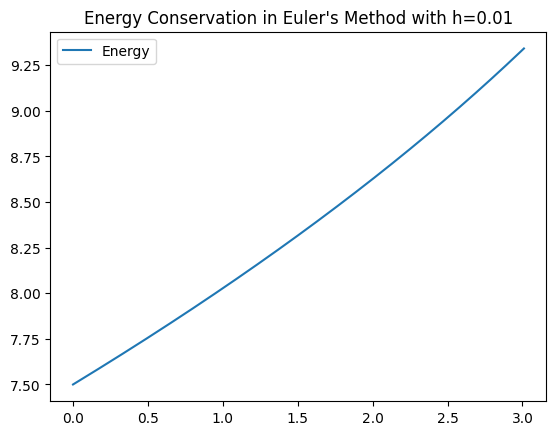

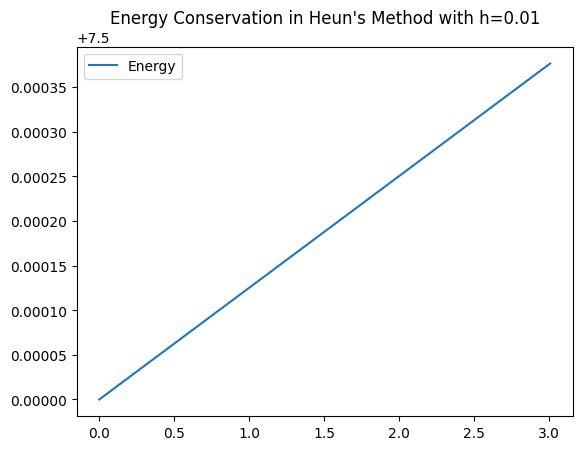

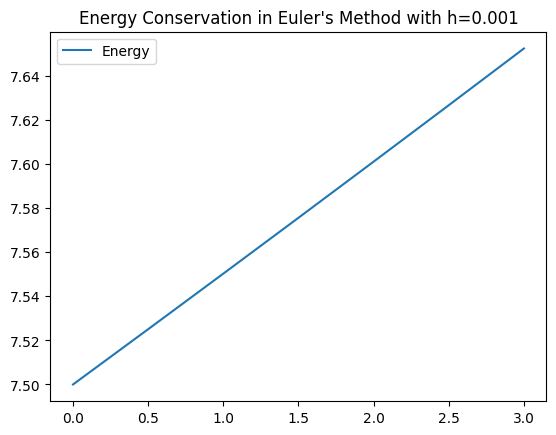

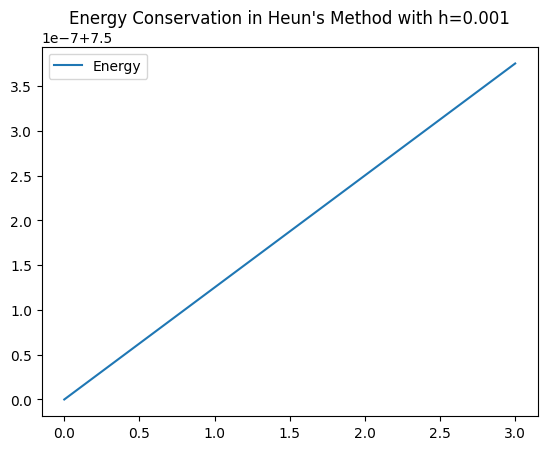

In [88]:
def energy(y, k1=100, k2=200, m1=10, m2=5):
    u, u_prime, v, v_prime = y.T
    return (m1 * u_prime**2) / 2 + (m2 * v_prime**2) / 2 + (k1 * u**2) / 2 + (k2 * (u - v)**2) / 2

# Compute energy for Heun's method with h=0.01 as an example
for h in step_lengths:
    t_values, y_values = euler_method(f, y0, t0, tn, h)
    E_values = energy(y_values)
    plt.figure()
    plt.title(f"Energy Conservation in Euler's Method with h={h}")
    plt.plot(t_values, E_values, label='Energy')
    plt.legend()
    plt.show()
    
    t_values, y_values = heun_method(f, y0, t0, tn, h)
    E_values = energy(y_values)
    plt.figure()
    plt.title(f"Energy Conservation in Heun's Method with h={h}")
    plt.plot(t_values, E_values, label='Energy')
    plt.legend()
    plt.show()


# P4. (Implementation of an ODE solver)

## 4a)
Find the three bugs

In [100]:
import numpy as np
f = lambda t, y: 2 / t**2 * y
t0, t_end = 1, 2
y0 = 1
N = 10
h = (t_end - t0) / N  # 1. "h" was not defined

y = np.zeros(N + 1)
t = np.zeros(N + 1)
y[0] = y0
t[0] = t0 # 2. Was: "t[0] = a". "a" is not defined

# Runge-Kutta loop
for n in range(N):
    k1 = f(t[n], y[n])
    k2 = f(t[n] + 0.5 * h, y[n] + 0.5 * h * k1)
    y[n + 1] = y[n] + h * k2
    t[n + 1] = t[n] + h  # 3. Must update t[n+1]
print('t =',t)
print('y =',y)

t = [1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ]
y = [1.         1.19954649 1.3959446  1.58703391 1.77149934 1.94861059
 2.11803539 2.2797082  2.43373863 2.58034807 2.71982609]


## 4b)
Which mathematical problem does this code intend to solve numerically?

The code aims to solve the first-order ordinary differential equation (ODE):

$$
\frac{dy}{dt} = \frac{2}{t^2} y
$$

with the initial condition $ y(1) = 1 $ over the interval $ t \in [1, 2] $.


## 4c)

Which specific algorithm has been applied to the problem? No specific name is required,
but present the method in the form of a Butcher tableau, and decide the order of the
method.

The algorithm used here is a form of the Runge-Kutta method, specifically a 2nd-order method. The Butcher tableau for this particular method is:

$$
\begin{array}{c|cc}
0 & 0 & 0 \\
1/2 & 1/2 & 0 \\
\hline
  & 0 & 1
\end{array}
$$

This indicates that the method is of order 2.


## 4d)
Find the first two elements of the NumPy vector y, given that point a) is accomplished.

In [101]:
print(y[:2])

[1.         1.19954649]
